In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [36]:
df = pd.read_csv('data/cleaned_student_lifestyle_dataset.csv')

In [37]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


First of all, let's check the correlation between GPA and study hours.

In [38]:
X = df['study_hours_per_day']
y = df['gpa']

In [39]:
X.corr(y)

np.float64(0.7344679806560491)

it seeems that there is a positive correlation between GPA and study hours. Let's visualize this relationship using a scatter plot.

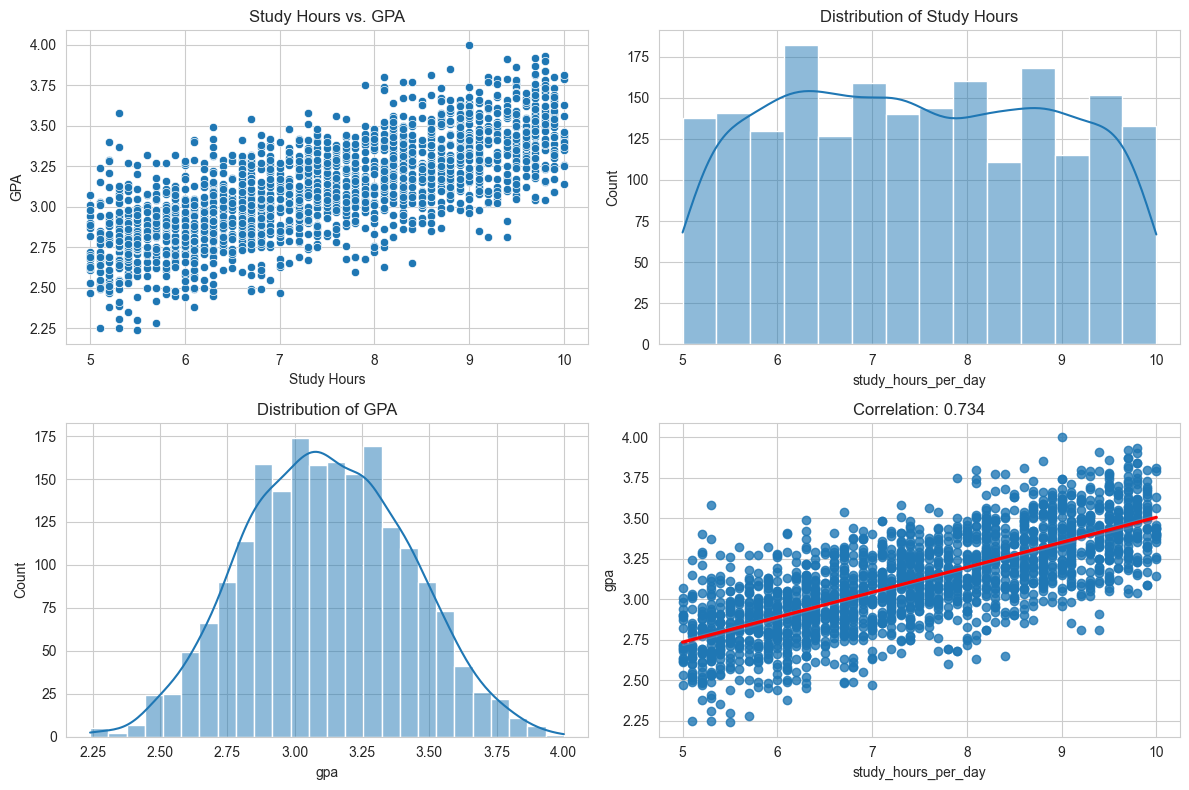

In [40]:
plt.figure(figsize=(12, 8))

# Scatter plot to visualize relationship
plt.subplot(2, 2, 1)
sns.scatterplot(x=X, y=y)
plt.title('Study Hours vs. GPA')
plt.xlabel('Study Hours')
plt.ylabel('GPA')

# Distribution of variables
plt.subplot(2, 2, 2)
sns.histplot(X, kde=True)
plt.title('Distribution of Study Hours')

plt.subplot(2, 2, 3)
sns.histplot(y, kde=True)
plt.title('Distribution of GPA')

# Correlation
plt.subplot(2, 2, 4)
sns.regplot(x=X, y=y, line_kws={'color': 'red'})
plt.title(f'Correlation: {X.corr(y):.3f}')

plt.tight_layout()
plt.show()

we see that there is a positive relation between study hours and GPA.
___
Now, let's apply Least Squares Regression to predict GPA based on study hours.

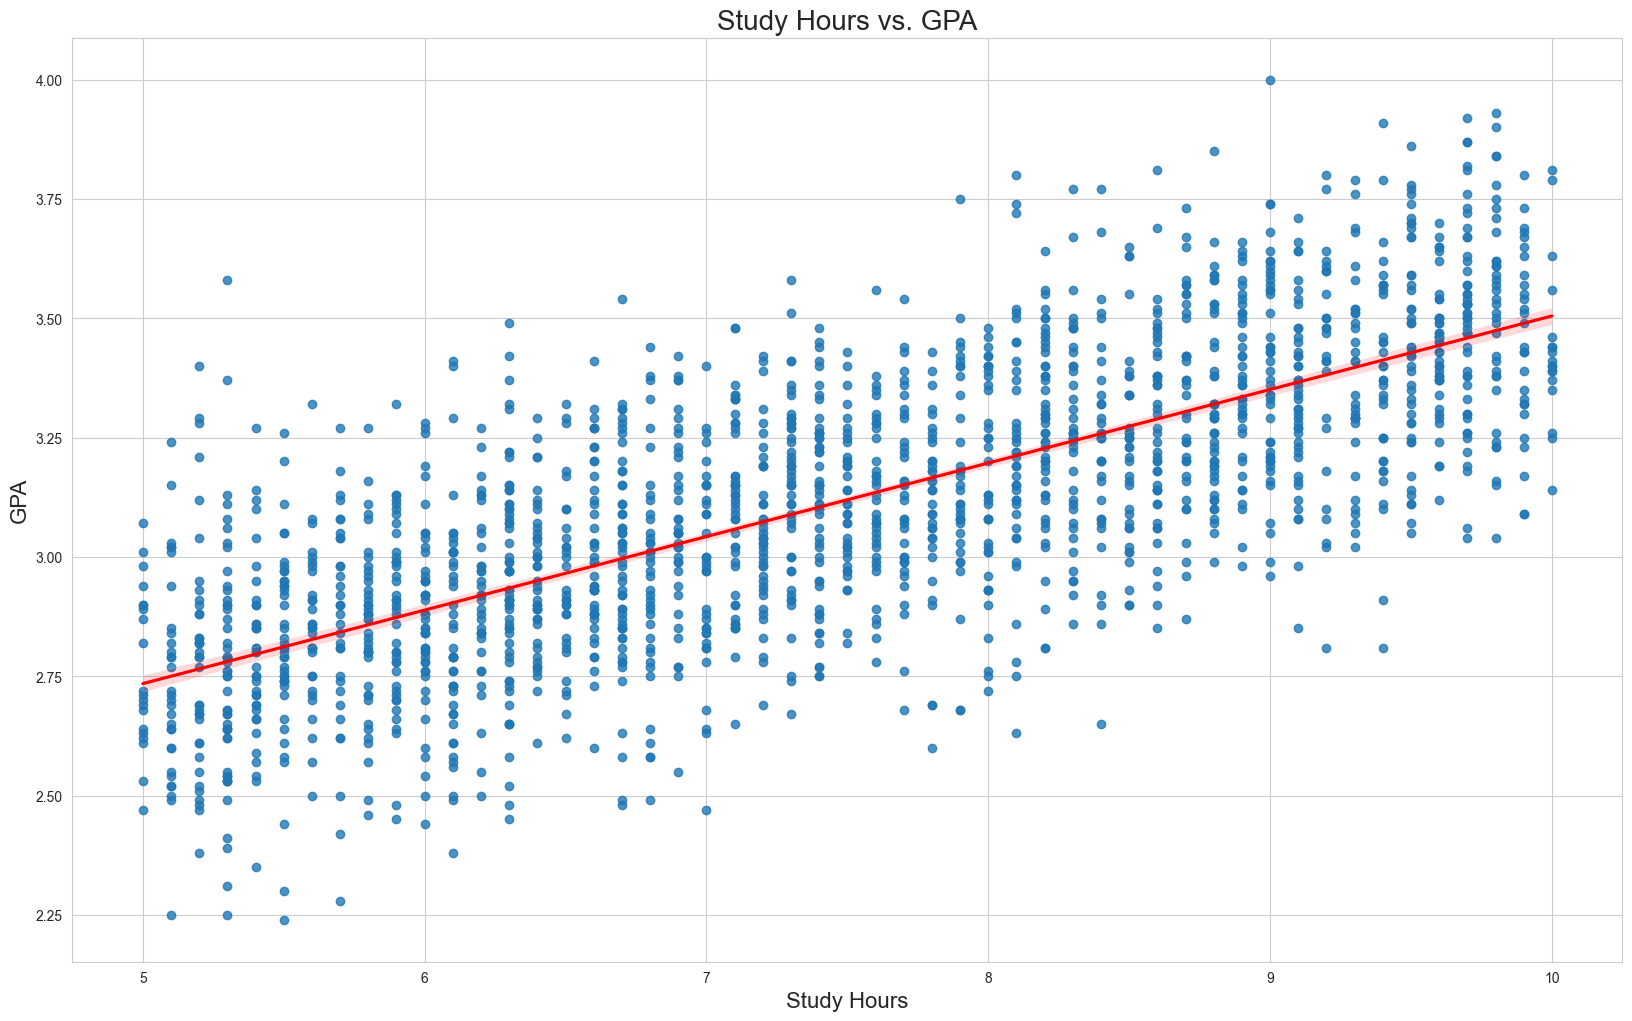

In [71]:
plt.figure(figsize=(20, 12))
sns.regplot(x=X, y=y, line_kws={'color': 'red'})
plt.title('Study Hours vs. GPA', fontsize=20)
plt.xlabel('Study Hours', fontsize=16)
plt.ylabel('GPA', fontsize=16)
sns.set_style("whitegrid")
plt.show()

### 2. Linear regression analysis

In [42]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [43]:
X_const = sm.add_constant(X)

In [44]:
model = sm.OLS(y, X_const).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     2340.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:08:34   Log-Likelihood:                 354.75
No. Observations:                2000   AIC:                            -705.5
Df Residuals:                    1998   BIC:                            -694.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9642      0.024     81.047      0.000       1.917       2.012
study_hours_per_day     0.1541      0.003     48.376      0.000       0.148       0.160
==============================================================================
Omnibus:                        0.638   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.552
Skew:                           0.021   Prob(JB):                        0.759
Kurtosis:                       3.070   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

predicted model is Yi = 1.9642 + 0.1541 * Xi, that means 1 unit increase in study hours will increase GPA by 0.1541.
___
let's check the assumptions for the linear regression model to apply test for significance of the regression coefficients

1. Linearity:
    As we saw before in the scatter plot, the relationship between study hours and GPA appears to be linear.

2. Independence of subjects

It is assumed that data is randomly selects

3. Homoscedasticity
    The variance of the residuals should be constant across all levels of the independent variable. We can check this using the Breusch-Pagan test and with plotting scatter plot of residuals.

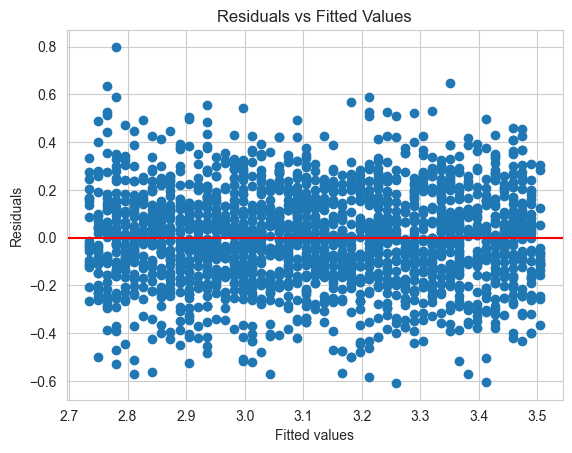

In [46]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Breusch-Pagan test is a statistical test that checks for heteroscedasticity in a regression model. The null hypothesis of the test is that the residuals are homoscedastic (i.e., have constant variance). If the p-value is less than 0.05, we reject the null hypothesis and conclude that heteroscedasticity is present.

In [47]:
bp_test = het_breuschpagan(model.resid, X_const)
print(f"Breusch-Pagan test p-value: {bp_test[1]:.4f}")
print("Null hypothesis: Homoscedasticity is present")
print("If p < 0.05: Heteroscedasticity detected\n")

Breusch-Pagan test p-value: 0.9180
Null hypothesis: Homoscedasticity is present
If p < 0.05: Heteroscedasticity detected



Since the p-value is less than 0.05, we can reject the Null hypothesis and conclude that heteroscedasticity is present. This means that the variance of the residuals is not constant across all levels of the independent variable (study hours). This violates one of the assumptions of linear regression.

4. Normality of residuals
    The residuals should be normally distributed. We can check this using a Q-Q plot and the Shapiro-Wilk test.

Text(0.5, 1.0, 'Distribution of Residuals')

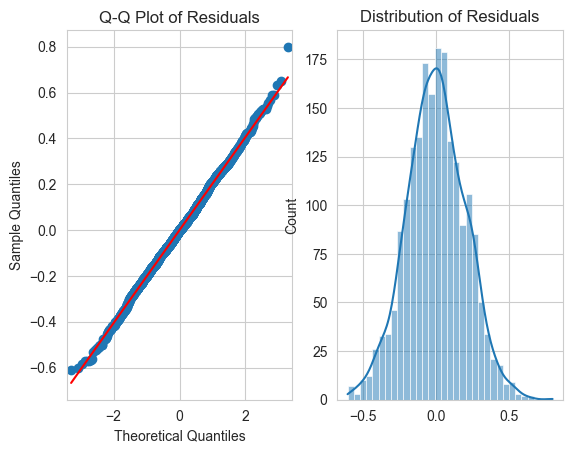

In [48]:
plt.subplot(1, 2, 1)
sm.qqplot(model.resid, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

# Histogram of residuals

plt.subplot(1, 2, 2)
sns.histplot(model.resid, kde=True)
plt.title('Distribution of Residuals')

It appears that the residuals are normally distributed. Let's confirm this using the Shapiro-Wilk test.

In [49]:
shapiro_test = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_test[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.4035
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



let's apply robust standard errors to fix the normality problem

In [50]:
robust_model = sm.OLS(y, X_const).fit(cov_type='HC3')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     2290.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:08:35   Log-Likelihood:                 354.75
No. Observations:                2000   AIC:                            -705.5
Df Residuals:                    1998   BIC:                            -694.3
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9642    

In [51]:
shapiro_test_robust = stats.shapiro(robust_model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_test_robust[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.4035
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



let's transform our data

In [52]:
X_log = np.log(X)
X_log_const = sm.add_constant(X_log)
log_model = sm.OLS(y, X_log_const).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2291.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:08:35   Log-Likelihood:                 343.31
No. Observations:                2000   AIC:                            -682.6
Df Residuals:                    1998   BIC:                            -671.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8844    

In [53]:
shapiro_log = stats.shapiro(log_model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_log[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.3434
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



In [54]:
X_sqrt = np.sqrt(X)
X_log_const = sm.add_constant(X_log)
sqrt_model = sm.OLS(y, X_log_const).fit()
print(sqrt_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2291.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:08:35   Log-Likelihood:                 343.31
No. Observations:                2000   AIC:                            -682.6
Df Residuals:                    1998   BIC:                            -671.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8844    

In [55]:
shapiro_square = stats.shapiro(sqrt_model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_square[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.3434
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



In [56]:
y_boxcox, lambda_value = stats.boxcox(y)
boxcox_model = sm.OLS(y_boxcox, X_const).fit()
print(f"Box-Cox lambda: {lambda_value:.4f}")
print(boxcox_model.summary())

Box-Cox lambda: 0.8421
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     2338.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:08:35   Log-Likelihood:                 712.13
No. Observations:                2000   AIC:                            -1420.
Df Residuals:                    1998   BIC:                            -1409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

In [57]:
shapiro_boxcox = stats.shapiro(boxcox_model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_boxcox[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.3519
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



In [58]:
weights = 1/(model.fittedvalues**2)
wls_model = sm.WLS(y, X_const, weights=weights).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.535
Model:                            WLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2303.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:08:35   Log-Likelihood:                 343.97
No. Observations:                2000   AIC:                            -683.9
Df Residuals:                    1998   BIC:                            -672.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9658    

In [59]:
shapiro_wls = stats.shapiro(wls_model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_wls[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.4015
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



In [60]:
X_recip = 1/X
X_recip_const = sm.add_constant(X_recip)
recip_model = sm.OLS(y, X_recip_const).fit()
print(recip_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2166.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          5.71e-321
Time:                        11:08:35   Log-Likelihood:                 313.85
No. Observations:                2000   AIC:                            -623.7
Df Residuals:                    1998   BIC:                            -612.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2024    

In [61]:
shapiro_recip = stats.shapiro(recip_model.resid)
print(f"Shapiro-Wilk test p-value: {shapiro_recip[1]:.4f}")
print("Null hypothesis: Residuals are normally distributed")
print("If p < 0.05: Residuals are not normal\n")

Shapiro-Wilk test p-value: 0.3194
Null hypothesis: Residuals are normally distributed
If p < 0.05: Residuals are not normal



Since transformations didn't work let's apply bootstrap instead of test for significance

In [62]:
n_bootstrap = 5000
bootstrap_params = np.zeros((n_bootstrap, 2))

perform bootstrap

In [63]:
for i in range(n_bootstrap):
    # Sample with replacement
    idx = np.random.choice(len(X), len(X), replace=True)
    X_boot, y_boot = X.iloc[idx], y.iloc[idx]
    X_boot_const = sm.add_constant(X_boot)

    # Fit model on bootstrap sample
    boot_model = sm.OLS(y_boot, X_boot_const).fit()
    bootstrap_params[i, :] = boot_model.params

Calculate standard errors and ci

In [64]:
bootstrap_se = bootstrap_params.std(axis=0)
bootstrap_ci = np.percentile(bootstrap_params, [2.5, 97.5], axis=0)

In [65]:
print(f"Bootstrap SE: {bootstrap_se}")
print(f"Bootstrap 95% CI for intercept: [{bootstrap_ci[0,0]:.4f}, {bootstrap_ci[1,0]:.4f}]")
print(f"Bootstrap 95% CI for slope: [{bootstrap_ci[0,1]:.4f}, {bootstrap_ci[1,1]:.4f}]")

Bootstrap SE: [0.02456353 0.00322401]
Bootstrap 95% CI for intercept: [1.9164, 2.0126]
Bootstrap 95% CI for slope: [0.1477, 0.1603]


In [66]:
sig_intercept = not (bootstrap_ci[0,0] <= 0 <= bootstrap_ci[1,0])
sig_slope = not (bootstrap_ci[0,1] <= 0 <= bootstrap_ci[1,1])
print(f"Intercept significant: {sig_intercept}")
print(f"Slope significant: {sig_slope}")

Intercept significant: True
Slope significant: True


Since o not in ci for intercept and slope of significance we can say that we are 95 % that the true population slope is laying in [0.1477, 0.1605]

## Bootstrap Visualization


/tmp/ipykernel_96363/2519158422.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvline(model.params[0], color='r', linestyle='--', label='OLS Estimate')
/tmp/ipykernel_96363/2519158422.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvline(model.params[1], color='r', linestyle='--', label='OLS Estimate')
/tmp/ipykernel_96363/2519158422.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(model.params[0

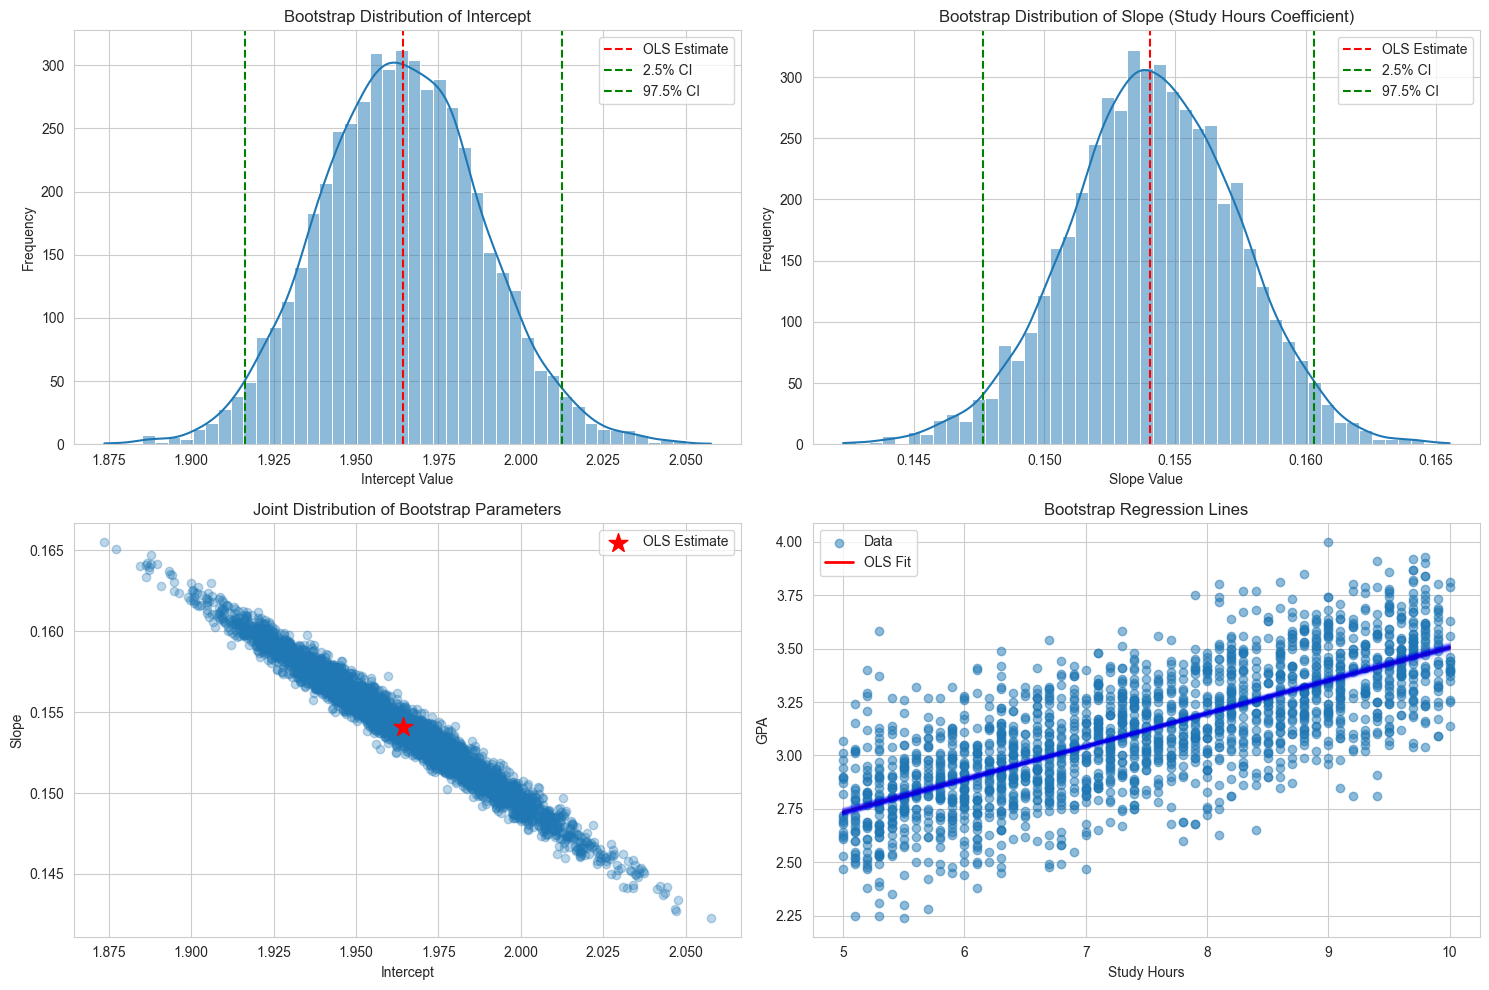

In [72]:
# Create visualizations of bootstrap results
plt.figure(figsize=(15, 10))

# Histogram of bootstrap intercepts
plt.subplot(2, 2, 1)
sns.histplot(bootstrap_params[:, 0], kde=True)
plt.axvline(model.params[0], color='r', linestyle='--', label='OLS Estimate')
plt.axvline(bootstrap_ci[0, 0], color='g', linestyle='--', label='2.5% CI')
plt.axvline(bootstrap_ci[1, 0], color='g', linestyle='--', label='97.5% CI')
plt.title('Bootstrap Distribution of Intercept')
plt.xlabel('Intercept Value')
plt.ylabel('Frequency')
plt.legend()

# Histogram of bootstrap slopes
plt.subplot(2, 2, 2)
sns.histplot(bootstrap_params[:, 1], kde=True)
plt.axvline(model.params[1], color='r', linestyle='--', label='OLS Estimate')
plt.axvline(bootstrap_ci[0, 1], color='g', linestyle='--', label='2.5% CI')
plt.axvline(bootstrap_ci[1, 1], color='g', linestyle='--', label='97.5% CI')
plt.title('Bootstrap Distribution of Slope (Study Hours Coefficient)')
plt.xlabel('Slope Value')
plt.ylabel('Frequency')
plt.legend()

# Scatter plot of bootstrap coefficients
plt.subplot(2, 2, 3)
plt.scatter(bootstrap_params[:, 0], bootstrap_params[:, 1], alpha=0.3)
plt.scatter(model.params[0], model.params[1], color='r', marker='*', s=200, label='OLS Estimate')
plt.title('Joint Distribution of Bootstrap Parameters')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.legend()

# Regression lines from bootstrap samples
plt.subplot(2, 2, 4)
plt.scatter(X, y, alpha=0.5, label='Data')

# Plot original regression line
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, model.params[0] + model.params[1] * x_range, 'r-', linewidth=2, label='OLS Fit')

# Plot 100 random bootstrap regression lines
for i in np.random.choice(n_bootstrap, 100):
    plt.plot(x_range, bootstrap_params[i, 0] + bootstrap_params[i, 1] * x_range, 'b-', alpha=0.05)

plt.title('Bootstrap Regression Lines')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.legend()

plt.tight_layout()
plt.show()


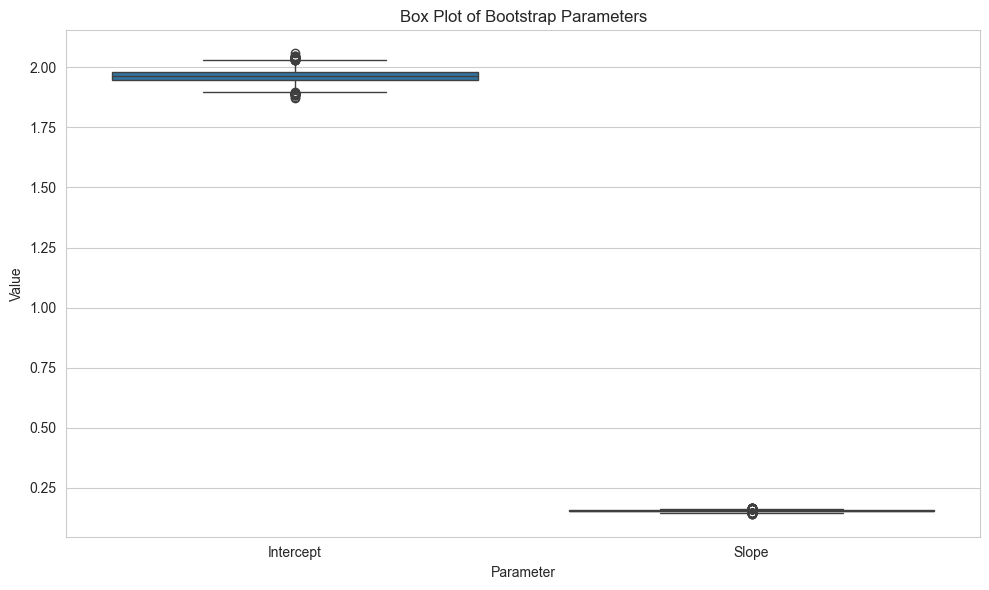

In [73]:
# Create a box plot for the bootstrap parameters
plt.figure(figsize=(10, 6))
bootstrap_df = pd.DataFrame({
    'Intercept': bootstrap_params[:, 0],
    'Slope': bootstrap_params[:, 1]
})

# Reshape for box plot
bootstrap_melted = pd.melt(bootstrap_df, var_name='Parameter', value_name='Value')
sns.boxplot(x='Parameter', y='Value', data=bootstrap_melted)
plt.title('Box Plot of Bootstrap Parameters')
plt.tight_layout()
plt.show()


/tmp/ipykernel_96363/2016005551.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvline(model.params[0] + model.params[1] * x_pred, color='r', linestyle='--',
/tmp/ipykernel_96363/2016005551.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=f'OLS Prediction: {model.params[0] + model.params[1] * x_pred:.3f}')


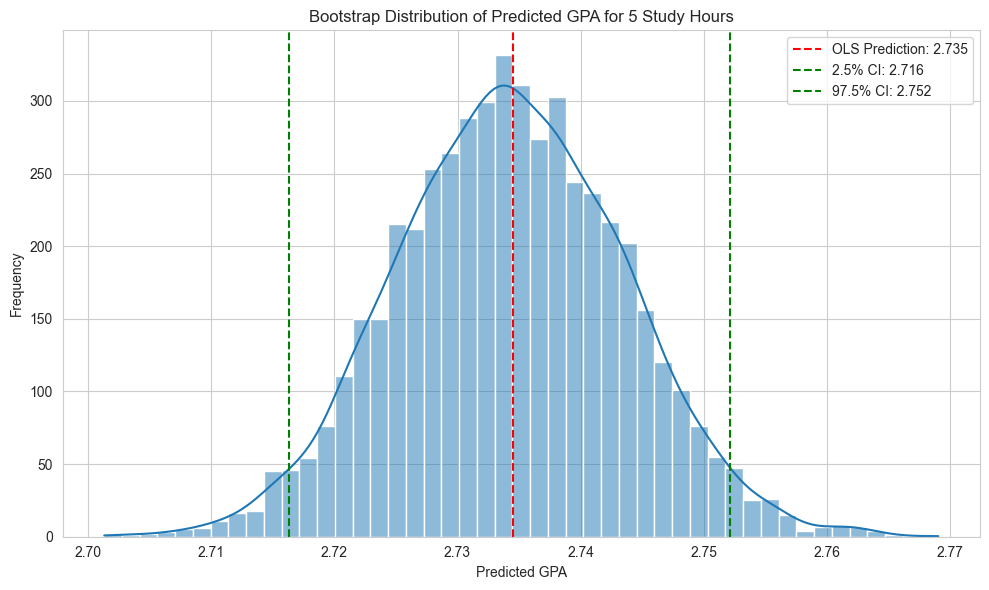

In [74]:
# Plot the distribution of predicted values for a specific X value
x_pred = 5  # Prediction for 5 hours of study
y_preds = bootstrap_params[:, 0] + bootstrap_params[:, 1] * x_pred

plt.figure(figsize=(10, 6))
sns.histplot(y_preds, kde=True)
plt.axvline(model.params[0] + model.params[1] * x_pred, color='r', linestyle='--',
           label=f'OLS Prediction: {model.params[0] + model.params[1] * x_pred:.3f}')

pred_ci = np.percentile(y_preds, [2.5, 97.5])
plt.axvline(pred_ci[0], color='g', linestyle='--',
           label=f'2.5% CI: {pred_ci[0]:.3f}')
plt.axvline(pred_ci[1], color='g', linestyle='--',
           label=f'97.5% CI: {pred_ci[1]:.3f}')

plt.title(f'Bootstrap Distribution of Predicted GPA for {x_pred} Study Hours')
plt.xlabel('Predicted GPA')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

